### Problem Statement: 


Understand how the test scores are related to other factors such as gender and race

### Import packages and CVS 

In [4]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import CSV as Pandas dataframe
df = pd.read_csv('data/StudentsPerformance.csv')

### Observations

In [10]:
# Show top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# Shape of the df
df.shape

(1000, 8)

Data set information: 
- gender: Male, Female
- race/ethnicity: Group A, B, or C
- parental level of education: some college, associate's degree, bachelor's degree, master's degree	
- lunch: standard, free/reduced	
- test preparation course: none, completed
- math score
- reading score
- writing score

### Data Checks

In [15]:
# Check Missing Values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
# Check Duplications
df.duplicated().sum()

0

In [18]:
# Check columns' data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
# Check statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
# Check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
# Define numerical columns and categorical columns
numerical_column = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_column = [feature for feature in df.columns if df[feature].dtype =='O']

print(f"We have {len(numerical_column)} numerical columns: {numerical_column}")
print(f"We have {len(categorical_column)} numerical columns: {categorical_column}")

We have 3 numerical columns: ['math score', 'reading score', 'writing score']
We have 5 numerical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [34]:
# Check the unique values in the categorical columns
print(f"gender: {df['gender'].unique()}")
print(f"race/ethnicity: {df['race/ethnicity'].unique()}")
print(f"parental level of education: {df['parental level of education'].unique()}")
print(f"lunch: {df['lunch'].unique()}")
print(f"test preparation course: {df['test preparation course'].unique()}")

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


### Add Columns "Total" & "Average"

In [47]:
# Add Total and Average columns
df['total']= df['math score'] + df['reading score'] + df['writing score']
df['average'] = (df['Total'] / 3).round(1)

In [58]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

print(f"{math_full} students have full marks in Math")
print(f"{reading_full} students have full marks in Reading")
print(f"{writing_full} students have full marks in Writing")



7 students have full marks in Math
17 students have full marks in Reading
14 students have full marks in Writing


### Visualizations

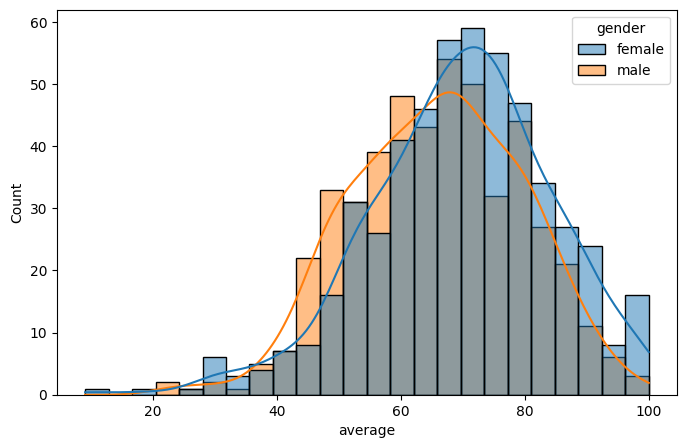

In [86]:
# Create a histogram to determine if gender affects average
fig1, axs1 = plt.subplots(1,1,figsize=(8,5))
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

Insight: Female tends to perform better

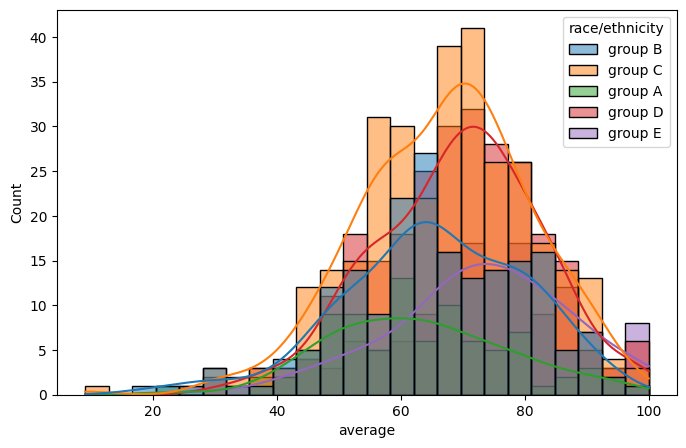

In [79]:
# Create a histogram to determine if race affects average
fig2, axs2 = plt.subplots(1,1,figsize=(8,5))
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.show()

Insight: Group A and B perform poorly

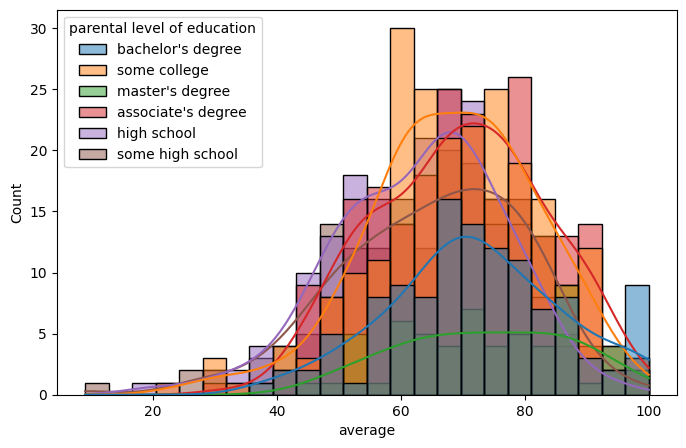

In [81]:
# Create a histogram to determine if parental level of education affects average
fig3, axs3 = plt.subplots(1,1,figsize=(8,5))
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.show()

Insight: Parental level of education doesn't affect their children marks significantly

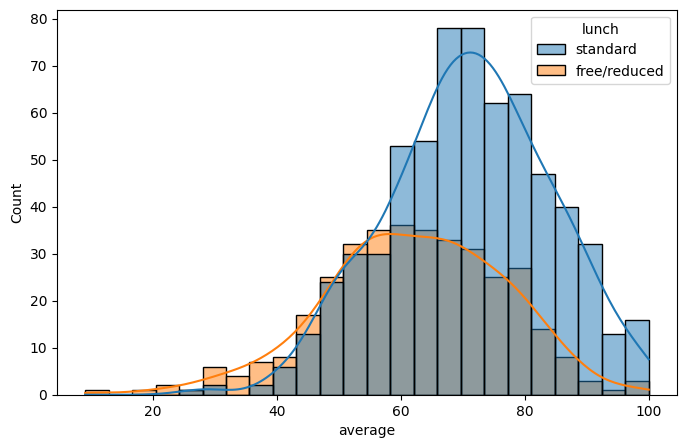

In [83]:
# Create a histogram to determine if lunch affects average
fig4, axs4 = plt.subplots(1,1,figsize=(8,5))
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.show()

Insight: Having standard lunch helps students perform better

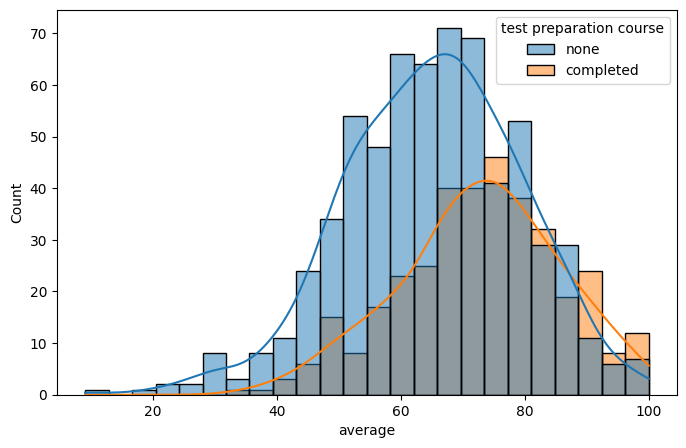

In [85]:
# Create a histogram to determine if completing a test preparation course affects average
fig5, axs5 = plt.subplots(1,1,figsize=(8,5))
sns.histplot(data=df, x='average', kde=True, hue='test preparation course')
plt.show()

Insight: students who have completed a prep course perform better

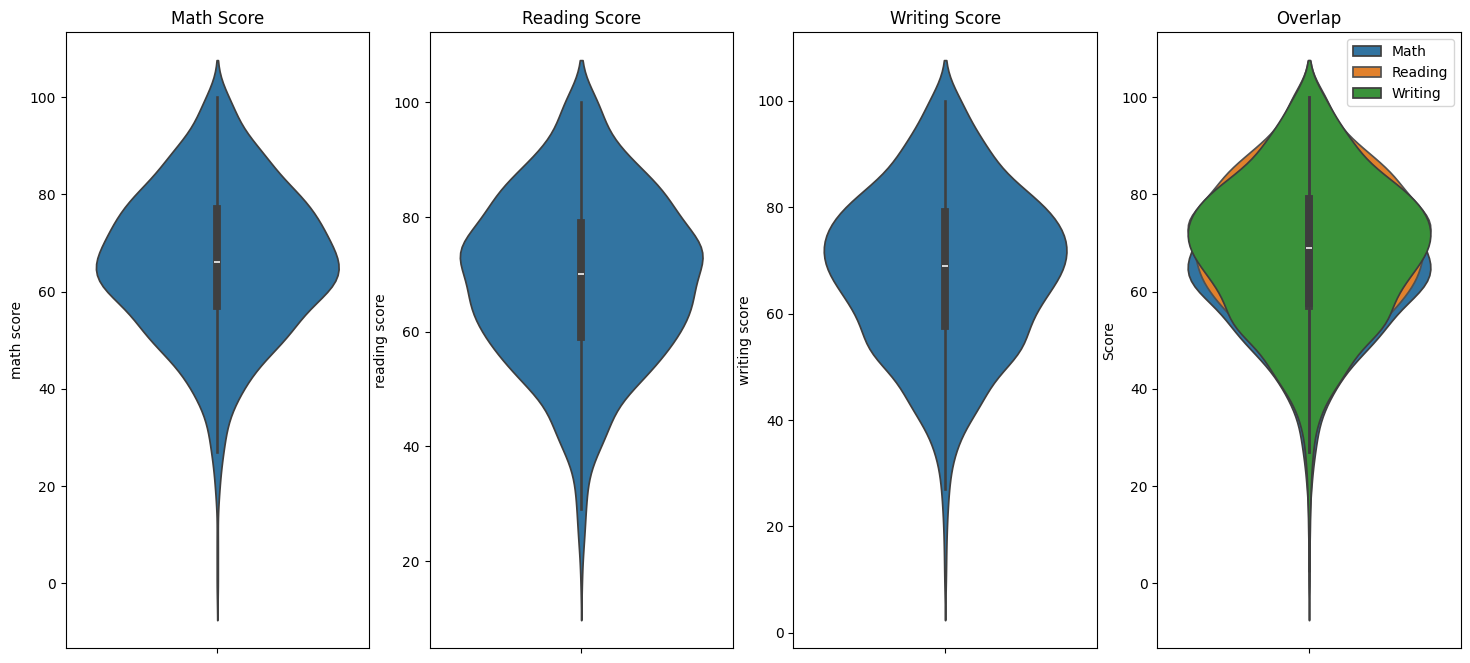

In [108]:
fig, axs = plt.subplots(1, 4, figsize=(18,8))
axs[0].set_title("Math Score")
sns.violinplot(data=df, y='math score', ax=axs[0])
axs[1].set_title("Reading Score")
sns.violinplot(data=df, y='reading score', ax=axs[1])
axs[2].set_title("Writing Score")
sns.violinplot(data=df, y='writing score', ax=axs[2])
axs[3].set_title("Overlap")
axs[3].set_ylabel("Score")
sns.violinplot(data=df, y='math score', ax=axs[3], label='Math')
sns.violinplot(data=df, y='reading score', ax=axs[3], label='Reading')
sns.violinplot(data=df, y='writing score', ax=axs[3], label='Writing')
plt.show()

Insight: Generally, students get higher scores in Writing and Reading than Math

### Conclusions